In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Import Data

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from google.colab import drive


# Đường dẫn đầy đủ đến các tệp dữ liệu trên Google Drive
x_train_path = '/content/drive/MyDrive/Dataset/MC/data_batch_2'
y_train_path = '/content/drive/MyDrive/Dataset/MC/data_batch_2'
x_test_path = '/content/drive/MyDrive/Dataset/MC/data_batch_2'
y_test_path = '/content/drive/MyDrive/Dataset/MC/data_batch_2'

x_train = np.load(x_train_path, allow_pickle=True)
y_train = np.load(y_train_path, allow_pickle=True)
x_test = np.load(x_test_path, allow_pickle=True)
y_test = np.load(y_test_path, allow_pickle=True)

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

# Normalizing
x_train = x_train / 255
x_test = x_test / 255

# One hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [1]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


# VGGNet


In [ ]:
# Importing the necessary libraries, which we may or may not use. Its always good idea to import them befor (if you remember) else we can do it at any point of time no problem.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, ReLU
from tensorflow.keras import Model
class VGGNet:

    vgg16_configs = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))

    def __init__(self, num_classes=10, input_shape=(32, 32, 3), configs = vgg16_configs, name='VGG16'):
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.configs = configs
        self.name = name

    def _vgg_block(self, x, filters, num_convs):
        for _ in range(num_convs):
            x = Conv2D(filters=filters, kernel_size =3, padding ='same')(x)
            x = BatchNormalization()(x)
            x = ReLU()(x)
        x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
        return x

    def build(self):

        # VGGNet
        input_layer = Input(shape=self.input_shape)
        x = input_layer
        for (num_conv, filter) in self.configs:
            x = self._vgg_block(x, filters=filter, num_convs=num_conv)

        # Fully connected layers
        x = Flatten()(x)
        x = Dense(units=256, activation='relu')(x)
        x = Dense(units=256, activation='relu')(x)
        output = Dense(units=self.num_classes, activation='softmax')(x)

        # Create the model
        model = Model(inputs=input_layer, outputs=output, name=self.name)
        return model

configs = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
vgg16 = VGGNet(num_classes=10, input_shape=(32, 32, 3), configs=configs).build()

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(
    learning_rate=0.0002,
    beta_1=0.96,
    beta_2=0.9994,
    epsilon=4e-08,
    amsgrad=False,
    name='Adam')

vgg16.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
vgg16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                            

In [ ]:
history1 = vgg16.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))
evaluation = vgg16.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

Epoch 1/20
1563/1563 [==============================] - 77s 35ms/step - loss: 1.3088 - accuracy: 0.5228 - val_loss: 1.1904 - val_accuracy: 0.6028
Epoch 2/20
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8443 - accuracy: 0.7060 - val_loss: 0.9460 - val_accuracy: 0.6803
Epoch 3/20
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6422 - accuracy: 0.7799 - val_loss: 0.8856 - val_accuracy: 0.7048
Epoch 4/20
1563/1563 [==============================] - 54s 35ms/step - loss: 0.5055 - accuracy: 0.8284 - val_loss: 0.8210 - val_accuracy: 0.7445
Epoch 5/20
1563/1563 [==============================] - 54s 35ms/step - loss: 0.4107 - accuracy: 0.8610 - val_loss: 0.5717 - val_accuracy: 0.8075
Epoch 6/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.3262 - accuracy: 0.8898 - val_loss: 0.7733 - val_accuracy: 0.7625
Epoch 7/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.2633 - accuracy: 0.9114 - val_loss: 0.5468 -

In [ ]:
evaluation = vgg16.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))


313/313 [==============================] - 3s 10ms/step - loss: 0.7861 - accuracy: 0.8274
Test Accuracy: 0.8274000287055969


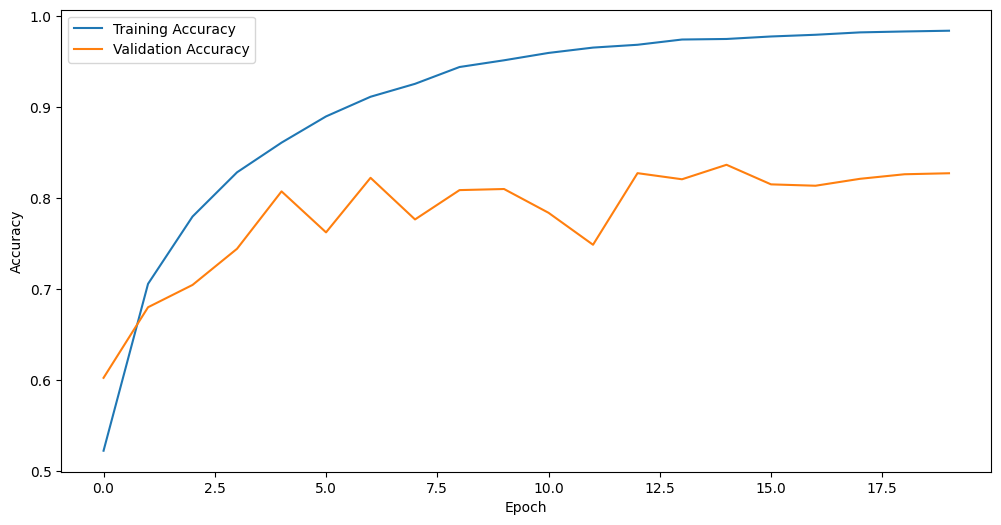

In [ ]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ accuracy và loss trong quá trình huấn luyện
plt.figure(figsize=(12, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

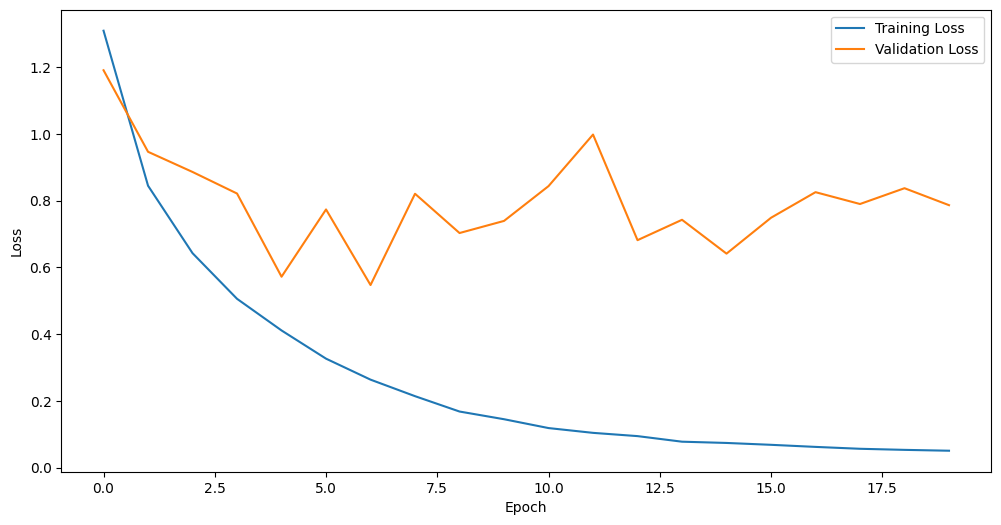

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# DenseNet


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import math
import sys

class BottleNeck(tf.keras.Model):
    def __init__(self, in_channels, growth_rate):
        super(BottleNeck, self).__init__()
        self.bn1 = layers.BatchNormalization()
        self.conv1 = layers.Conv2D(4*growth_rate, kernel_size=1, use_bias=False)
        self.bn2 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(growth_rate, kernel_size=3, padding='same', use_bias=False)

    def call(self, x):
        out = self.conv1(tf.keras.activations.relu(self.bn1(x)))
        out = self.conv2(tf.keras.activations.relu(self.bn2(out)))
        out = layers.concatenate([out, x])
        return out

class Transition(tf.keras.Model):
    def __init__(self, in_channels, out_channels):
        super(Transition, self).__init__()
        self.bn = layers.BatchNormalization()
        self.conv = layers.Conv2D(out_channels, kernel_size=1, use_bias=False)
        self.avg_pool2d = layers.AveragePooling2D(pool_size=2)

    def call(self, x):
        out = self.conv(tf.keras.activations.relu(self.bn(x)))
        out = self.avg_pool2d(out)
        return out

class BuildDenseNet(tf.keras.Model):
    def __init__(self, block, num_blocks, growth_rate=12, reduction=0.5, num_classes=10):
        super(BuildDenseNet, self).__init__()
        self.growth_rate = growth_rate

        num_channels = 2*growth_rate
        self.conv1 = layers.Conv2D(num_channels, kernel_size=3, padding='same', use_bias=False)

        self.dense1 = self._make_layer(block, num_channels, num_blocks[0])
        num_channels += num_blocks[0] * growth_rate
        out_channels = int(math.floor(num_channels*reduction))
        self.trans1 = Transition(num_channels, out_channels)
        num_channels = out_channels

        self.dense2 = self._make_layer(block, num_channels, num_blocks[1])
        num_channels += num_blocks[1] * growth_rate
        out_channels = int(math.floor(num_channels*reduction))
        self.trans2 = Transition(num_channels, out_channels)
        num_channels = out_channels

        self.dense3 = self._make_layer(block, num_channels, num_blocks[2])
        num_channels += num_blocks[2] * growth_rate
        out_channels = int(math.floor(num_channels*reduction))
        self.trans3 = Transition(num_channels, out_channels)
        num_channels = out_channels

        self.dense4 = self._make_layer(block, num_channels, num_blocks[3])
        num_channels += num_blocks[3] * growth_rate

        self.bn = layers.BatchNormalization()
        self.avg_pool2d = layers.AveragePooling2D(pool_size=4)
        self.flatten = layers.Flatten()
        self.fc = layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        out = self.conv1(x)
        out = self.trans1(self.dense1(out))
        out = self.trans2(self.dense2(out))
        out = self.trans3(self.dense3(out))
        out = tf.keras.activations.relu(self.bn(self.dense4(out)))
        out = self.avg_pool2d(out)
        out = self.flatten(out)
        out = self.fc(out)
        return out

    def _make_layer(self, block, in_channels, num_block):
        layer = []
        for i in range(num_block):
            layer += [block(in_channels, self.growth_rate)]
            in_channels += self.growth_rate
        return tf.keras.Sequential(layer)

def DenseNet(model_type, num_classes):
    if model_type == 'densenet121':
        return BuildDenseNet(BottleNeck, [6, 12, 24, 16], growth_rate=32, num_classes=num_classes)
    elif model_type == 'densenet161':
        return BuildDenseNet(BottleNeck, [6, 12, 36, 24], growth_rate=48, num_classes=num_classes)
    elif model_type == 'densenet169':
        return BuildDenseNet(BottleNeck, [6, 12, 32, 32], growth_rate=32, num_classes=num_classes)
    elif model_type == 'densenet201':
        return BuildDenseNet(BottleNeck, [6, 12, 48, 32], growth_rate=32, num_classes=num_classes)
    else:
        sys.exit(ValueError("{:s} is currently not supported.".format(model_type)))

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

num_classes = 10
learning_rate = 0.001
batch_size = 64
epochs = 10

model = DenseNet('densenet121', num_classes)

model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/10
258/782 [========>.....................] - ETA: 14:32:29 - loss: 1.5957 - accuracy: 0.4136

# AlexNet

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models, losses

def alexnet(img_input, classes=10):
  # 1st conv layer
  x = Conv2D(96, (11, 11), strides=(4, 4), padding='same', activation='relu', kernel_initializer='uniform')(img_input)  # valid
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = BatchNormalization()(x)

  # 2nd conv layer
  x = Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform')(x)
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = BatchNormalization()(x)

  # 3rd conv layer
  x = Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)

  # 4th conv layer
  x = Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)

  # 5th conv layer
  x = Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform')(x)
  x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
  x = BatchNormalization()(x)

  # flattening before sending to fully connected layers
  x = Flatten()(x)
  # fully connected layers
  x = Dense(4096, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)
  x = Dense(1000, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)

  # output layer
  out = Dense(classes, activation='softmax')(x)
  return out


# defining input image size according to cifar10
img_input = Input(shape=(32, 32, 3))
output = alexnet(img_input)
alexnet = Model(img_input, output)
alexnet.summary()

NameError: ignored

In [8]:
from tensorflow.keras.optimizers import Adam
opt = Adam(
    learning_rate=0.0002,
    beta_1=0.96,
    beta_2=0.9994,
    epsilon=4e-08,
    amsgrad=False,
    name='Adam')
alexnet.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
alexnet.summary()

AttributeError: ignored

In [ ]:
history = alexnet.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))
evaluation = alexnet.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
evaluation = alexnet.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))


In [ ]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ accuracy và loss trong quá trình huấn luyện
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()